In [ ]:
from google.colab import files
uploaded=files.upload()

Saving drug.csv.csv to drug.csv.csv


In [ ]:
import numpy as np 
import pandas as pd
import io
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df=pd.read_csv(io.BytesIO(uploaded['drug.csv.csv']))
print(df)

     Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  drugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  drugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]


In [ ]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [ ]:
df['Sex'].value_counts()

M    104
F     96
Name: Sex, dtype: int64

In [ ]:
df["Sex"].dtype

dtype('O')

In [ ]:
df["BP"].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [ ]:
df["Cholesterol"].value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

(array([103.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  97.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

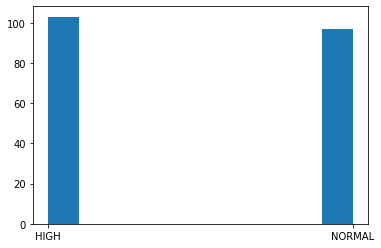

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df["Cholesterol"])

(array([77.,  0.,  0.,  0.,  0., 64.,  0.,  0.,  0., 59.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

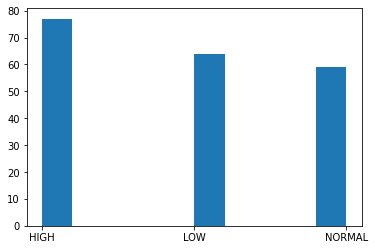

In [ ]:
plt.hist(df["BP"])

In [ ]:
 #Pre-Processing 
 #In order to convert the values of columns such as sex, BP, Cholestrol in integer or number we use dummy variables and then delete the oroginal columns from it(such as sex ,BP etc) method as follows:
 #By this, in sex column female will be replaced by 1 and male will be replaced by 0 here.
 

In [ ]:
#Create Dummy Variable + Rename +  Concat + Drop Original Column 

In [ ]:
from sklearn import preprocessing

In [ ]:
df2=df

In [ ]:
df2.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [ ]:
dummy_variable_1 = pd.get_dummies(df["Sex"])
dummy_variable_1.head()

,F,M
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0


In [ ]:
dummy_variable_1.rename(columns={'M':'Sex_Male', 'F':'Sex_Female'}, inplace=True)
dummy_variable_1.head()

,Sex_Female,Sex_Male
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0


In [ ]:
# merge data frame "df" and "dummy_variable_1" 
df3 = pd.concat([df2, dummy_variable_1], axis=1)


In [ ]:
df2.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [ ]:
df3.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Sex_Female,Sex_Male
0,23,F,HIGH,HIGH,25.355,drugY,1,0
1,47,M,LOW,HIGH,13.093,drugC,0,1
2,47,M,LOW,HIGH,10.114,drugC,0,1
3,28,F,NORMAL,HIGH,7.798,drugX,1,0
4,61,F,LOW,HIGH,18.043,drugY,1,0


In [ ]:
#drop original column "Sex" from "df"
df3.drop('Sex', axis = 1, inplace=True)
df3.head()

,Age,BP,Cholesterol,Na_to_K,Drug,Sex_Female,Sex_Male
0,23,HIGH,HIGH,25.355,drugY,1,0
1,47,LOW,HIGH,13.093,drugC,0,1
2,47,LOW,HIGH,10.114,drugC,0,1
3,28,NORMAL,HIGH,7.798,drugX,1,0
4,61,LOW,HIGH,18.043,drugY,1,0


In [ ]:
df3.head()

,Age,BP,Cholesterol,Na_to_K,Drug,Sex_Female,Sex_Male
0,23,HIGH,HIGH,25.355,drugY,1,0
1,47,LOW,HIGH,13.093,drugC,0,1
2,47,LOW,HIGH,10.114,drugC,0,1
3,28,NORMAL,HIGH,7.798,drugX,1,0
4,61,LOW,HIGH,18.043,drugY,1,0


In [ ]:
dummy_variable_2 = pd.get_dummies(df3["BP"])
dummy_variable_2.head()

,HIGH,LOW,NORMAL
0,1,0,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0


In [ ]:
dummy_variable_2.rename(columns={'LOW':'LOW_BP', 'NORMAL':'NORMAL_BP','HIGH':'HIGH_BP'}, inplace=True)
dummy_variable_2.head()


,HIGH_BP,LOW_BP,NORMAL_BP
0,1,0,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0


In [ ]:
df3 = pd.concat([df3, dummy_variable_2], axis=1)


In [ ]:
df3.drop('BP', axis = 1, inplace=True)

In [ ]:
df3.head()

,Age,Cholesterol,Na_to_K,Drug,Sex_Female,Sex_Male,HIGH_BP,LOW_BP,NORMAL_BP
0,23,HIGH,25.355,drugY,1,0,1,0,0
1,47,HIGH,13.093,drugC,0,1,0,1,0
2,47,HIGH,10.114,drugC,0,1,0,1,0
3,28,HIGH,7.798,drugX,1,0,0,0,1
4,61,HIGH,18.043,drugY,1,0,0,1,0


In [ ]:
dummy_variable_3 = pd.get_dummies(df["Cholesterol"])

In [ ]:
dummy_variable_3.rename(columns={'HIGH':'HIGH_Ch', 'NORMAL':'NORMAL_Ch'}, inplace=True)

In [ ]:
df3 = pd.concat([df3, dummy_variable_3], axis=1)

In [ ]:
df3.drop('Cholesterol', axis = 1, inplace=True)

In [ ]:
df3.head()

,Age,Na_to_K,Drug,Sex_Female,Sex_Male,HIGH_BP,LOW_BP,NORMAL_BP,HIGH_Ch,NORMAL_Ch
0,23,25.355,drugY,1,0,1,0,0,1,0
1,47,13.093,drugC,0,1,0,1,0,1,0
2,47,10.114,drugC,0,1,0,1,0,1,0
3,28,7.798,drugX,1,0,0,0,1,1,0
4,61,18.043,drugY,1,0,0,1,0,1,0


In [ ]:
X=df3[["Age","Na_to_K","Sex_Female","Sex_Male","HIGH_BP","LOW_BP","NORMAL_BP","HIGH_Ch","NORMAL_Ch"]]
Y=df3[["Drug"]]

In [ ]:
X[0:3]

,Age,Na_to_K,Sex_Female,Sex_Male,HIGH_BP,LOW_BP,NORMAL_BP,HIGH_Ch,NORMAL_Ch
0,23,25.355,1,0,1,0,0,1,0
1,47,13.093,0,1,0,1,0,1,0
2,47,10.114,0,1,0,1,0,1,0


In [ ]:
Y[0:3]

,Drug
0,drugY
1,drugC
2,drugC


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, Y, test_size=0.2, random_state=3)

In [ ]:
X_trainset.shape

(160, 9)

In [ ]:
y_trainset.shape

(160, 1)

In [ ]:
 X_testset

,Age,Na_to_K,Sex_Female,Sex_Male,HIGH_BP,LOW_BP,NORMAL_BP,HIGH_Ch,NORMAL_Ch
40,73,19.221,1,0,0,0,1,1,0
51,67,10.898,0,1,0,0,1,0,1
139,69,10.065,1,0,0,0,1,1,0
197,52,9.894,0,1,0,0,1,1,0
170,28,12.879,1,0,0,0,1,1,0
82,32,9.712,1,0,0,1,0,1,0
183,36,15.490,1,0,1,0,0,0,1
46,37,13.091,1,0,1,0,0,1,0
70,70,13.967,0,1,1,0,0,1,0
100,31,11.871,0,1,1,0,0,0,1


In [ ]:
 X_testset.shape

(40, 9)

In [ ]:
 y_testset.shape

(40, 1)

In [ ]:
 y_testset

,Drug
40,drugY
51,drugX
139,drugX
197,drugX
170,drugX
82,drugC
183,drugY
46,drugA
70,drugB
100,drugA


In [ ]:
y_testset[0:1]

,Drug
40,drugY


In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
#drugTree # it shows the default parameters

In [ ]:
clf.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
predTree = clf.predict(X_testset)

In [ ]:
print (predTree [0:5])
print (y_testset [0:5])


['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
      Drug
40   drugY
51   drugX
139  drugX
197  drugX
170  drugX


In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  1.0


[Text(0.625, 0.9, 'X[1] <= 14.829\nentropy = 1.921\nsamples = 160\nvalue = [19, 12, 12, 38, 79]'),
 Text(0.5, 0.7, 'X[4] <= 0.5\nentropy = 1.819\nsamples = 81\nvalue = [19, 12, 12, 38, 0]'),
 Text(0.25, 0.5, 'X[7] <= 0.5\nentropy = 0.795\nsamples = 50\nvalue = [0, 0, 12, 38, 0]'),
 Text(0.125, 0.3, 'entropy = 0.0\nsamples = 27\nvalue = [0, 0, 0, 27, 0]'),
 Text(0.375, 0.3, 'X[5] <= 0.5\nentropy = 0.999\nsamples = 23\nvalue = [0, 0, 12, 11, 0]'),
 Text(0.25, 0.1, 'entropy = 0.0\nsamples = 11\nvalue = [0, 0, 0, 11, 0]'),
 Text(0.5, 0.1, 'entropy = 0.0\nsamples = 12\nvalue = [0, 0, 12, 0, 0]'),
 Text(0.75, 0.5, 'X[0] <= 50.5\nentropy = 0.963\nsamples = 31\nvalue = [19, 12, 0, 0, 0]'),
 Text(0.625, 0.3, 'entropy = 0.0\nsamples = 19\nvalue = [19, 0, 0, 0, 0]'),
 Text(0.875, 0.3, 'entropy = 0.0\nsamples = 12\nvalue = [0, 12, 0, 0, 0]'),
 Text(0.75, 0.7, 'entropy = 0.0\nsamples = 79\nvalue = [0, 0, 0, 0, 79]')]

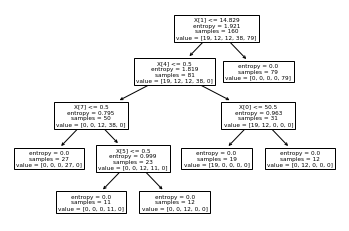

In [ ]:
 from sklearn import tree
tree.plot_tree(clf)

In [ ]:
y_pred = clf.predict(X_testset)

In [ ]:
print(y_pred)

['drugY' 'drugX' 'drugX' 'drugX' 'drugX' 'drugC' 'drugY' 'drugA' 'drugB'
 'drugA' 'drugY' 'drugA' 'drugY' 'drugY' 'drugX' 'drugY' 'drugX' 'drugX'
 'drugB' 'drugX' 'drugX' 'drugY' 'drugY' 'drugY' 'drugX' 'drugB' 'drugY'
 'drugY' 'drugA' 'drugX' 'drugB' 'drugC' 'drugC' 'drugX' 'drugX' 'drugC'
 'drugY' 'drugX' 'drugX' 'drugX']


In [ ]:
print(X_trainset.shape)
print(X_testset.shape)
print(X_trainset.shape)
print(y_testset.shape)

(160, 9)
(40, 9)
(160, 9)
(40, 1)


In [ ]:
#Testing Accuracy
y_pred = clf.predict(X_testset)
print (metrics.accuracy_score(y_testset, y_pred))

1.0


In [ ]:
predicted = clf.predict(X_testset[0:10])
expected = y_testset[0:10]

In [ ]:
print(predicted)

['drugY' 'drugX' 'drugX' 'drugX' 'drugX' 'drugC' 'drugY' 'drugA' 'drugB'
 'drugA']


In [ ]:
print(expected)

      Drug
40   drugY
51   drugX
139  drugX
197  drugX
170  drugX
82   drugC
183  drugY
46   drugA
70   drugB
100  drugA


In [ ]:
#Testing Accuracy 
y_pred = clf.predict(X_testset)
print (metrics.accuracy_score(y_testset, y_pred))

1.0
